# Trabalho

In [2]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor


## Importando os dados:


In [82]:
df_validation = pd.read_csv('validation_timeseries.csv',index_col=1, parse_dates=True)

In [4]:
df_test = pd.read_csv('train_timeseries.csv')

In [83]:
df = df_validation
#df = df.dropna()

In [87]:
df.dropna()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
date,,,,,,,,,,,,,,,,,,,,
2017-01-03,1001,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,9.20,14.06,2.25,3.73,1.64,2.09,4.80,7.27,2.54,4.72,2.0000
2017-01-10,1001,0.02,101.13,5.62,5.92,4.54,4.55,12.42,-2.37,14.79,5.81,3.22,4.24,2.52,1.72,6.19,7.55,4.68,2.86,2.0000
2017-01-17,1001,0.14,100.60,11.41,17.21,16.06,16.06,23.03,13.15,9.88,17.10,2.24,3.61,1.71,1.90,4.93,5.90,2.76,3.15,2.0000
2017-01-24,1001,0.00,99.72,5.60,9.27,5.34,5.35,16.23,4.18,12.06,8.95,1.82,2.34,1.03,1.31,3.52,6.49,1.47,5.02,1.0000
2017-01-31,1001,0.00,100.37,7.31,11.38,9.21,9.21,20.29,5.05,15.24,11.32,2.31,3.00,1.76,1.24,5.00,7.40,2.88,4.52,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-27,56043,0.21,82.62,2.88,-0.63,-6.30,-6.25,5.40,-5.43,10.83,-1.94,3.80,5.44,2.93,2.51,6.21,9.43,4.63,4.80,0.2572
2018-12-04,56043,0.01,83.32,1.47,-7.66,-14.71,-13.42,-1.41,-11.86,10.45,-8.96,3.26,5.23,2.20,3.03,4.82,6.46,3.79,2.67,0.2572
2018-12-11,56043,0.06,82.94,2.12,-3.04,-10.21,-9.60,2.45,-6.68,9.13,-4.08,3.59,5.09,2.07,3.01,5.69,8.44,3.42,5.01,0.2572


<AxesSubplot: xlabel='date'>

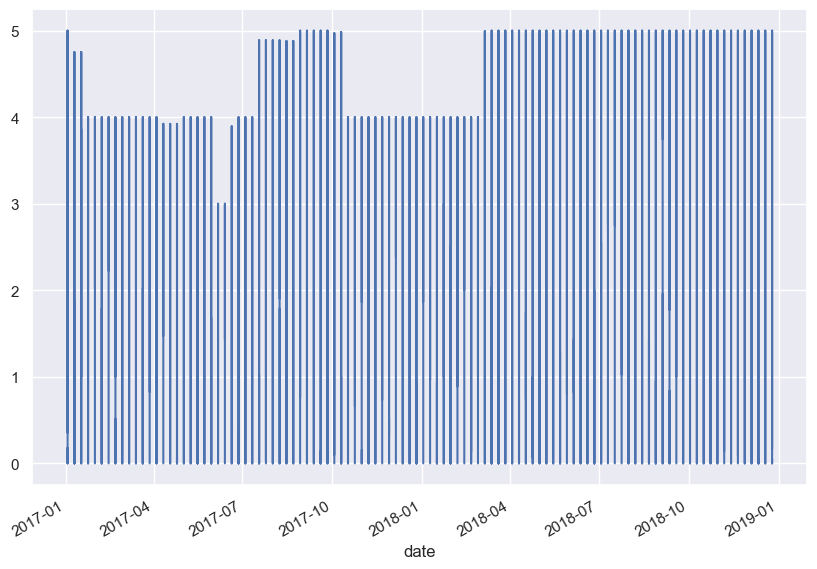

In [88]:
df['score'].plot()

## Manipulando os Dados:

In [98]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
#df['score'] = df['score'].round().astype(int)
df

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
2,1001,2017-01-03,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,...,1.64,2.09,4.80,7.27,2.54,4.72,2.0000,2017,1,3
9,1001,2017-01-10,0.02,101.13,5.62,5.92,4.54,4.55,12.42,-2.37,...,2.52,1.72,6.19,7.55,4.68,2.86,2.0000,2017,1,10
16,1001,2017-01-17,0.14,100.60,11.41,17.21,16.06,16.06,23.03,13.15,...,1.71,1.90,4.93,5.90,2.76,3.15,2.0000,2017,1,17
23,1001,2017-01-24,0.00,99.72,5.60,9.27,5.34,5.35,16.23,4.18,...,1.03,1.31,3.52,6.49,1.47,5.02,1.0000,2017,1,24
30,1001,2017-01-31,0.00,100.37,7.31,11.38,9.21,9.21,20.29,5.05,...,1.76,1.24,5.00,7.40,2.88,4.52,1.0000,2017,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268805,56043,2018-11-27,0.21,82.62,2.88,-0.63,-6.30,-6.25,5.40,-5.43,...,2.93,2.51,6.21,9.43,4.63,4.80,0.2572,2018,11,27
2268812,56043,2018-12-04,0.01,83.32,1.47,-7.66,-14.71,-13.42,-1.41,-11.86,...,2.20,3.03,4.82,6.46,3.79,2.67,0.2572,2018,12,4
2268819,56043,2018-12-11,0.06,82.94,2.12,-3.04,-10.21,-9.60,2.45,-6.68,...,2.07,3.01,5.69,8.44,3.42,5.01,0.2572,2018,12,11
2268826,56043,2018-12-18,0.06,82.77,3.09,0.69,-5.36,-5.17,5.77,-4.12,...,2.04,2.65,5.79,7.52,3.47,4.05,0.2572,2018,12,18


## Independencia e Dependencia de Atributos

In [128]:
independent_variables = df.drop('score', 1)
independent_variables = independent_variables.drop('fips', 1)
independent_variables = independent_variables.drop('date', 1)
independent_variables.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.50,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81
1,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,10.18,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41
2,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,7.41,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66
3,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58
4,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,13.48,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19


[None]

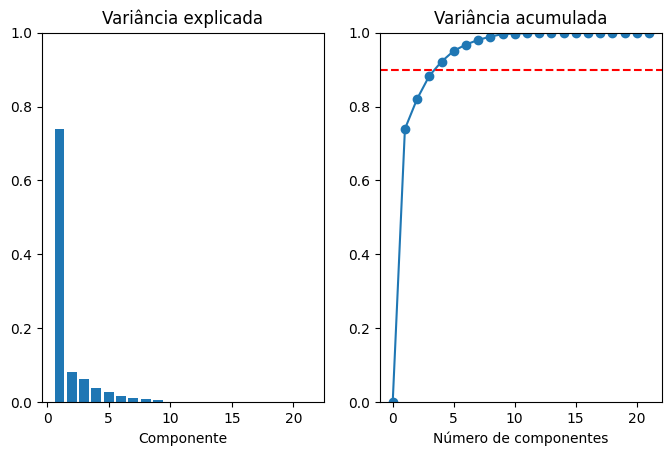

In [64]:
X = independent_variables
y = df_validation["score"]

pca = PCA()

pca.fit(X)

autovalores = pca.explained_variance_
autovetores = pca.components_.T

variancia_explicada = pca.explained_variance_ratio_


id_componentes = np.arange(1, pca.n_components_ + 1)

figura, eixos = plt.subplots(1, 2)

# Plot variância explicada
eixos[0].bar(id_componentes, variancia_explicada)
eixos[0].set(xlabel="Componente", title="Variância explicada", ylim=(0.0, 1.0))

# Plot variância acumulada
cv = np.cumsum(pca.explained_variance_ratio_)
eixos[1].plot(np.r_[0, id_componentes], np.r_[0, cv], marker="o")
eixos[1].set(
    xlabel="Número de componentes",
    title="Variância acumulada",
    ylim=(0.0, 1.0),
)
eixos[1].axhline(0.9, linestyle="--", color="red")

figura.set(figwidth=8)

In [109]:
df

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,...,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0000
7,1001,2019-01-08,0.05,100.57,8.75,13.15,12.01,11.98,20.04,9.36,...,13.05,2.33,3.40,1.68,1.72,5.13,6.51,3.67,2.85,0.0000
14,1001,2019-01-15,0.00,101.07,4.04,3.91,0.94,0.96,9.40,1.02,...,3.91,1.73,2.40,1.36,1.04,3.28,4.13,2.39,1.75,0.0000
21,1001,2019-01-22,0.03,101.14,4.96,6.03,3.81,3.08,12.43,-1.63,...,6.08,3.68,4.57,2.49,2.07,6.65,8.56,5.01,3.55,0.0000
28,1001,2019-01-29,5.79,100.36,3.69,2.23,-0.41,-1.03,7.33,-5.19,...,2.18,3.10,4.52,1.71,2.81,5.62,6.96,3.60,3.35,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271917,56043,2020-12-01,1.24,83.55,2.58,-2.42,-7.58,-5.00,0.38,-6.79,...,-2.74,5.42,8.52,2.85,5.68,7.81,10.34,5.13,5.21,3.5109
2271924,56043,2020-12-08,0.00,83.70,2.05,1.32,-10.65,-4.67,8.08,-3.27,...,-1.57,3.05,3.85,2.36,1.49,4.73,6.30,3.85,2.45,3.5109
2271931,56043,2020-12-15,0.14,82.90,2.04,-5.19,-10.64,-7.91,0.29,-8.63,...,-6.81,2.88,3.90,1.68,2.21,4.39,6.50,2.83,3.66,3.5182
2271938,56043,2020-12-22,1.64,82.00,3.13,-0.05,-5.29,-2.67,6.87,-7.05,...,-0.82,8.83,13.78,6.64,7.14,11.90,17.31,9.05,8.25,3.5182


In [100]:
colunas = df.columns.tolist()
print(colunas)

['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE', 'score', 'year', 'month', 'day']


In [9]:
selected_data = df[df['fips'] == 56043]

In [74]:
colunas_datascore = ['date','score']
secas = selected_data[colunas_datascore]
secas


,date,score
19294470,2000-01-01,NaN
19294471,2000-01-02,NaN
19294472,2000-01-03,NaN
19294473,2000-01-04,0.0
19294474,2000-01-05,NaN
...,...,...
19300675,2016-12-27,0.0
19300676,2016-12-28,NaN
19300677,2016-12-29,NaN
19300678,2016-12-30,NaN


In [1]:
df_datascore.plot(x='date', y='score', marker='.', linestyle='')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Gráfico de Séries Temporais')
plt.show()

NameError: name 'df_datascore' is not defined

In [68]:
secas['date'] = pd.to_datetime(secas['date'])

# Definindo as datas como índice
secas.set_index('date', inplace=True)

In [69]:
secas.dropna()

,score
date,
2000-01-04,0.0
2000-01-11,0.0
2000-01-18,0.0
2000-01-25,0.0
2000-02-01,0.0
...,...
2016-11-29,0.0
2016-12-06,0.0
2016-12-13,0.0


<AxesSubplot: >

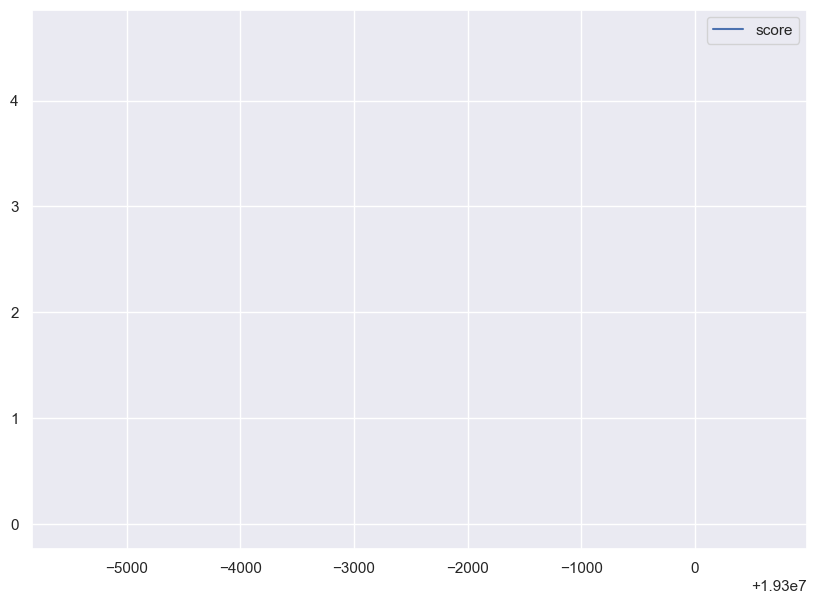

In [76]:
secas.plot()

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

y = secas['score']
nivel = np.array(y)

result = seasonal_decompose(nivel, model='additive', )
result.plot()

pyplot.show()

ValueError: This function does not handle missing values

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

# Playground

In [73]:
dados = {'coluna1': [1, 2, 3, 4],
         'coluna_alvo': [42, 42, 99, 42]}
df = pd.DataFrame(dados)

# Especificar o valor alvo
valor_alvo = 42

# Selecionar linhas onde a coluna_alvo é igual ao valor alvo
linhas_selecionadas = df[df['coluna_alvo'] == valor_alvo]

# Exibir o resultado
print(linhas_selecionadas)

   coluna1  coluna_alvo
0        1           42
1        2           42
3        4           42


In [ ]:
df['coluna_data'] = pd.to_datetime(df['coluna_data'])

# Definindo as datas como índice
df.set_index('coluna_data', inplace=True)